In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('C:/Users/varsh/Downloads/archive (1)\IRIS.csv')  # Replace with your path
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
print("total_columns = ",df.shape[0])
print("Null values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicates removed. Remaining rows:", df.shape[0])
df.head()

total_columns =  150
Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicated values: 3
Duplicates removed. Remaining rows: 147


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


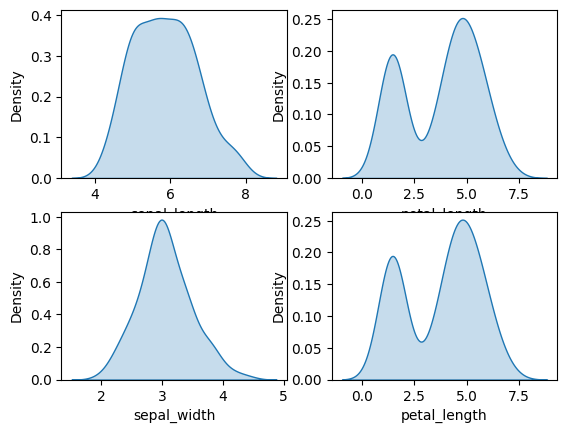

In [13]:
plt.subplot(2, 2, 1) 
sns.kdeplot(df['sepal_length'], fill=True)

plt.subplot(2, 2, 3)  
sns.kdeplot(df['sepal_width'], fill=True)

plt.subplot(2, 2, 2) 
sns.kdeplot(df['petal_length'], fill=True)

plt.subplot(2, 2, 4) 
sns.kdeplot(df['petal_length'], fill=True)

plt.show()

In [ ]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species'] 

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)


y_score = svc.predict_proba(X_test_scaled)
y_pred = svc.predict(X_test_scaled)

with open('trained_model.sav', 'wb') as f:
    pickle.dump((svc, scaler, le), f)

print(" Model, scaler, and encoder saved as trained_model.sav")



 Model, scaler, and encoder saved as trained_model.sav


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



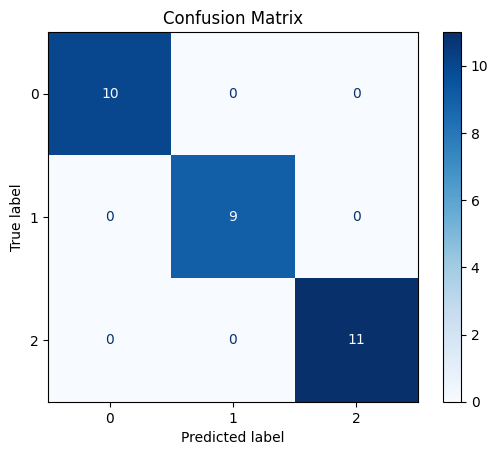

In [18]:
cm=confusion_matrix(y_test, y_pred)            #A confusion matrix is a table that shows the number of: TP,TN,FP,FN
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [7]:
sample=[[6.5, 3.0, 5.5, 2.0]] # Prediction for given input
sample_scaled=scaler.transform(sample)
predicted_class=svc.predict(sample_scaled)

# Directly take the predicted label
predicted_label=predicted_class[0]

print(f"\nPrediction for input {sample}: {predicted_label}")



Prediction for input [[6.5, 3.0, 5.5, 2.0]]: 2


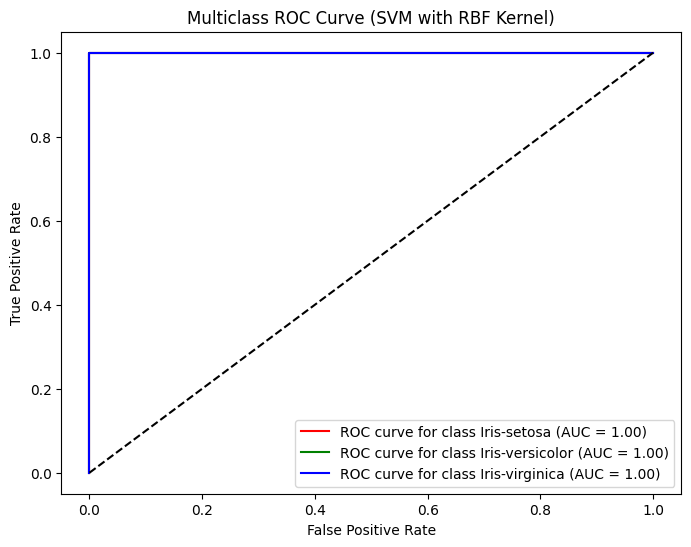

In [11]:


# Binarize the test labels for multiclass ROC
y_test_bin=label_binarize(y_test, classes=np.unique(y_train))
n_classes=y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label=f"ROC curve for class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (SVM with RBF Kernel)')
plt.legend(loc="lower right")
plt.show()


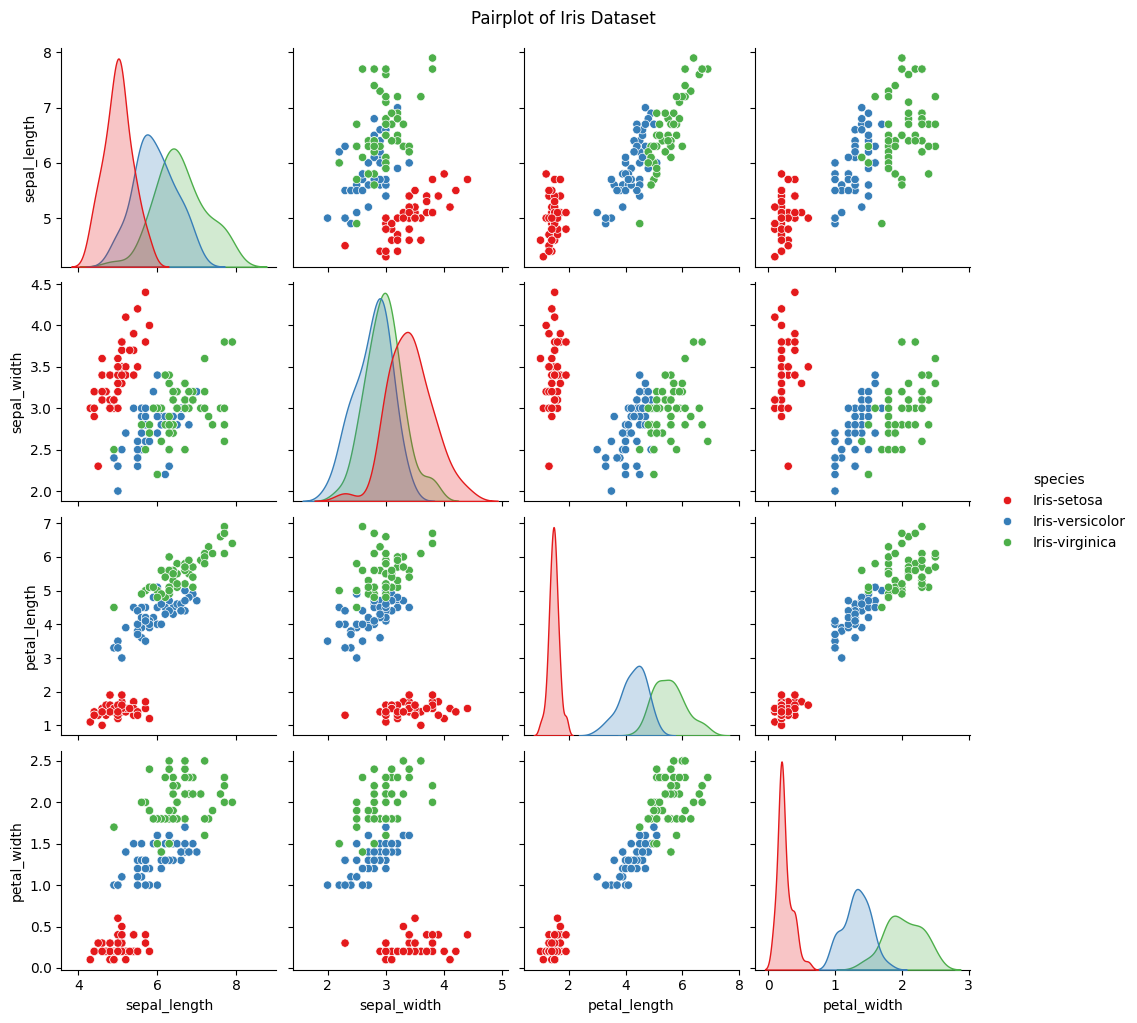

In [12]:
sns.pairplot(df, hue="species", palette="Set1")     #Uses hue="species" to color points by species.
                                                     #palette="Set1" → chooses a color scheme.

plt.suptitle("Pairplot of Iris Dataset", y=1.02)   #y=1.02 → controls the vertical position of the title.
plt.show()

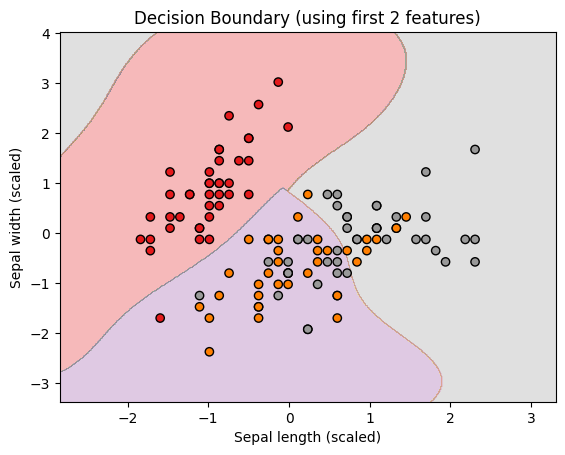

In [13]:
X_vis=X_train_scaled[:, :2]

# Train SVM
svm_model_vis=SVC(kernel='rbf')
svm_model_vis.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max=X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max=X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy=np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict class for each grid point
Z=svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert Z (string labels) to numeric for contourf
le=LabelEncoder()
le.fit(y_train)        # Fit encoder on training labels
Z_numeric=le.transform(Z)
Z_numeric=Z_numeric.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.Set1)

# Convert training labels to numeric for scatter
y_numeric=le.transform(y_train)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_numeric, edgecolors="k", cmap=plt.cm.Set1)
plt.title("Decision Boundary (using first 2 features)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()